In [1]:
import os
import mne

sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file, verbose=False)
raw.crop(tmax=60).load_data()

<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 376 x 36038 (60.0 sec), ~107.0 MB, data loaded>

In [2]:
fine_cal_file = os.path.join(sample_data_folder, 'SSS', 'sss_cal_mgh.dat')
crosstalk_file = os.path.join(sample_data_folder, 'SSS', 'ct_sparse_mgh.fif')

In [3]:
raw.info['bads'].extend(['MEG 1032', 'MEG 2313'])
raw_sss = mne.preprocessing.maxwell_filter(raw, cross_talk=crosstalk_file,
                                           calibration=fine_cal_file)

Maxwell filtering raw data
    Using loaded raw data
    Bad MEG channels being reconstructed: ['MEG 2443', 'MEG 1032', 'MEG 2313']
    Processing 204 gradiometers and 102 magnetometers
    Using fine calibration sss_cal_mgh.dat
        Adjusting non-orthogonal EX and EY
        Adjusted coil positions by (μ ± σ): 0.5° ± 0.4° (max: 2.1°)
    Automatic origin fit: head of radius 91.0 mm
    Using origin -4.1, 16.0, 51.7 mm in the head frame
        Using 87/95 harmonic components for    0.000  (72/80 in, 15/15 out)
    Processing 6 data chunks
[done]


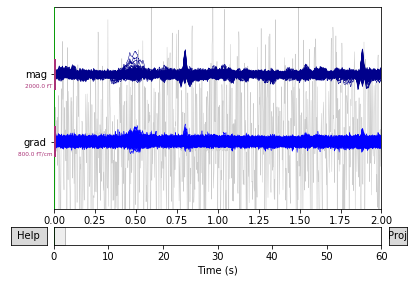

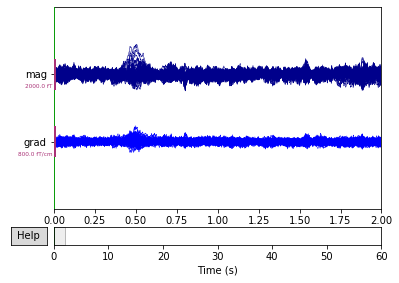

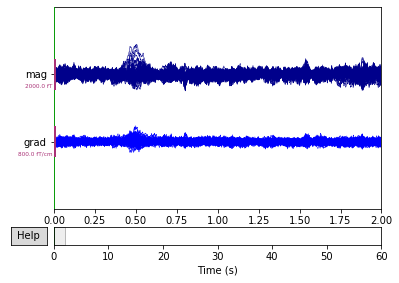

In [6]:
raw.pick(['meg']).plot(duration=2, butterfly=True)
raw_sss.pick(['meg']).plot(duration=2, butterfly=True)

Using default location ~/mne_data for testing...
[............................................................] unknown (975.2 MB,   3.1 MB/s) /
Verifying hash a7da51964edb2fbb3c59026af617dbcc.
Decompressing the archive: C:\Users\rkm14\mne_data\mne-testing-data-0.72.tar.gz
(please be patient, this can take some time)
Successfully extracted to: ['C:\\Users\\rkm14\\mne_data\\MNE-testing-data']


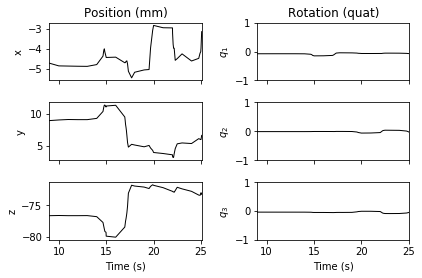

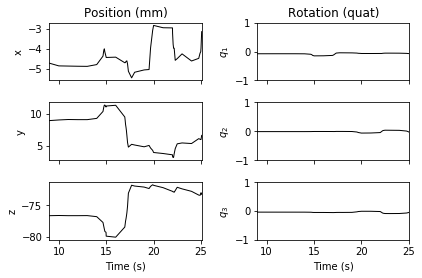

In [5]:
head_pos_file = os.path.join(mne.datasets.testing.data_path(), 'SSS',
                             'test_move_anon_raw.pos')
head_pos = mne.chpi.read_head_pos(head_pos_file)
mne.viz.plot_head_positions(head_pos, mode='traces')